# Plotting SEM images with insets all in one

In [1]:
from skimage import data, io, util, segmentation, color, draw, filters
import numpy as np
from scipy import ndimage
%matplotlib nbagg
import matplotlib
from matplotlib import cm
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from PIL import Image
import os 
import sys
import cv2
import pytesseract
from skimage import exposure


debug = True #or 'False' when you do not want to debug

path = "/Users/sfiligoj/Google Drive/Crispies/Ru/Plots/as_deposited"
os.chdir(path)
filess= os.listdir()
filess = [f for f in filess if f.endswith('tif')]

<IPython.core.display.Javascript object>


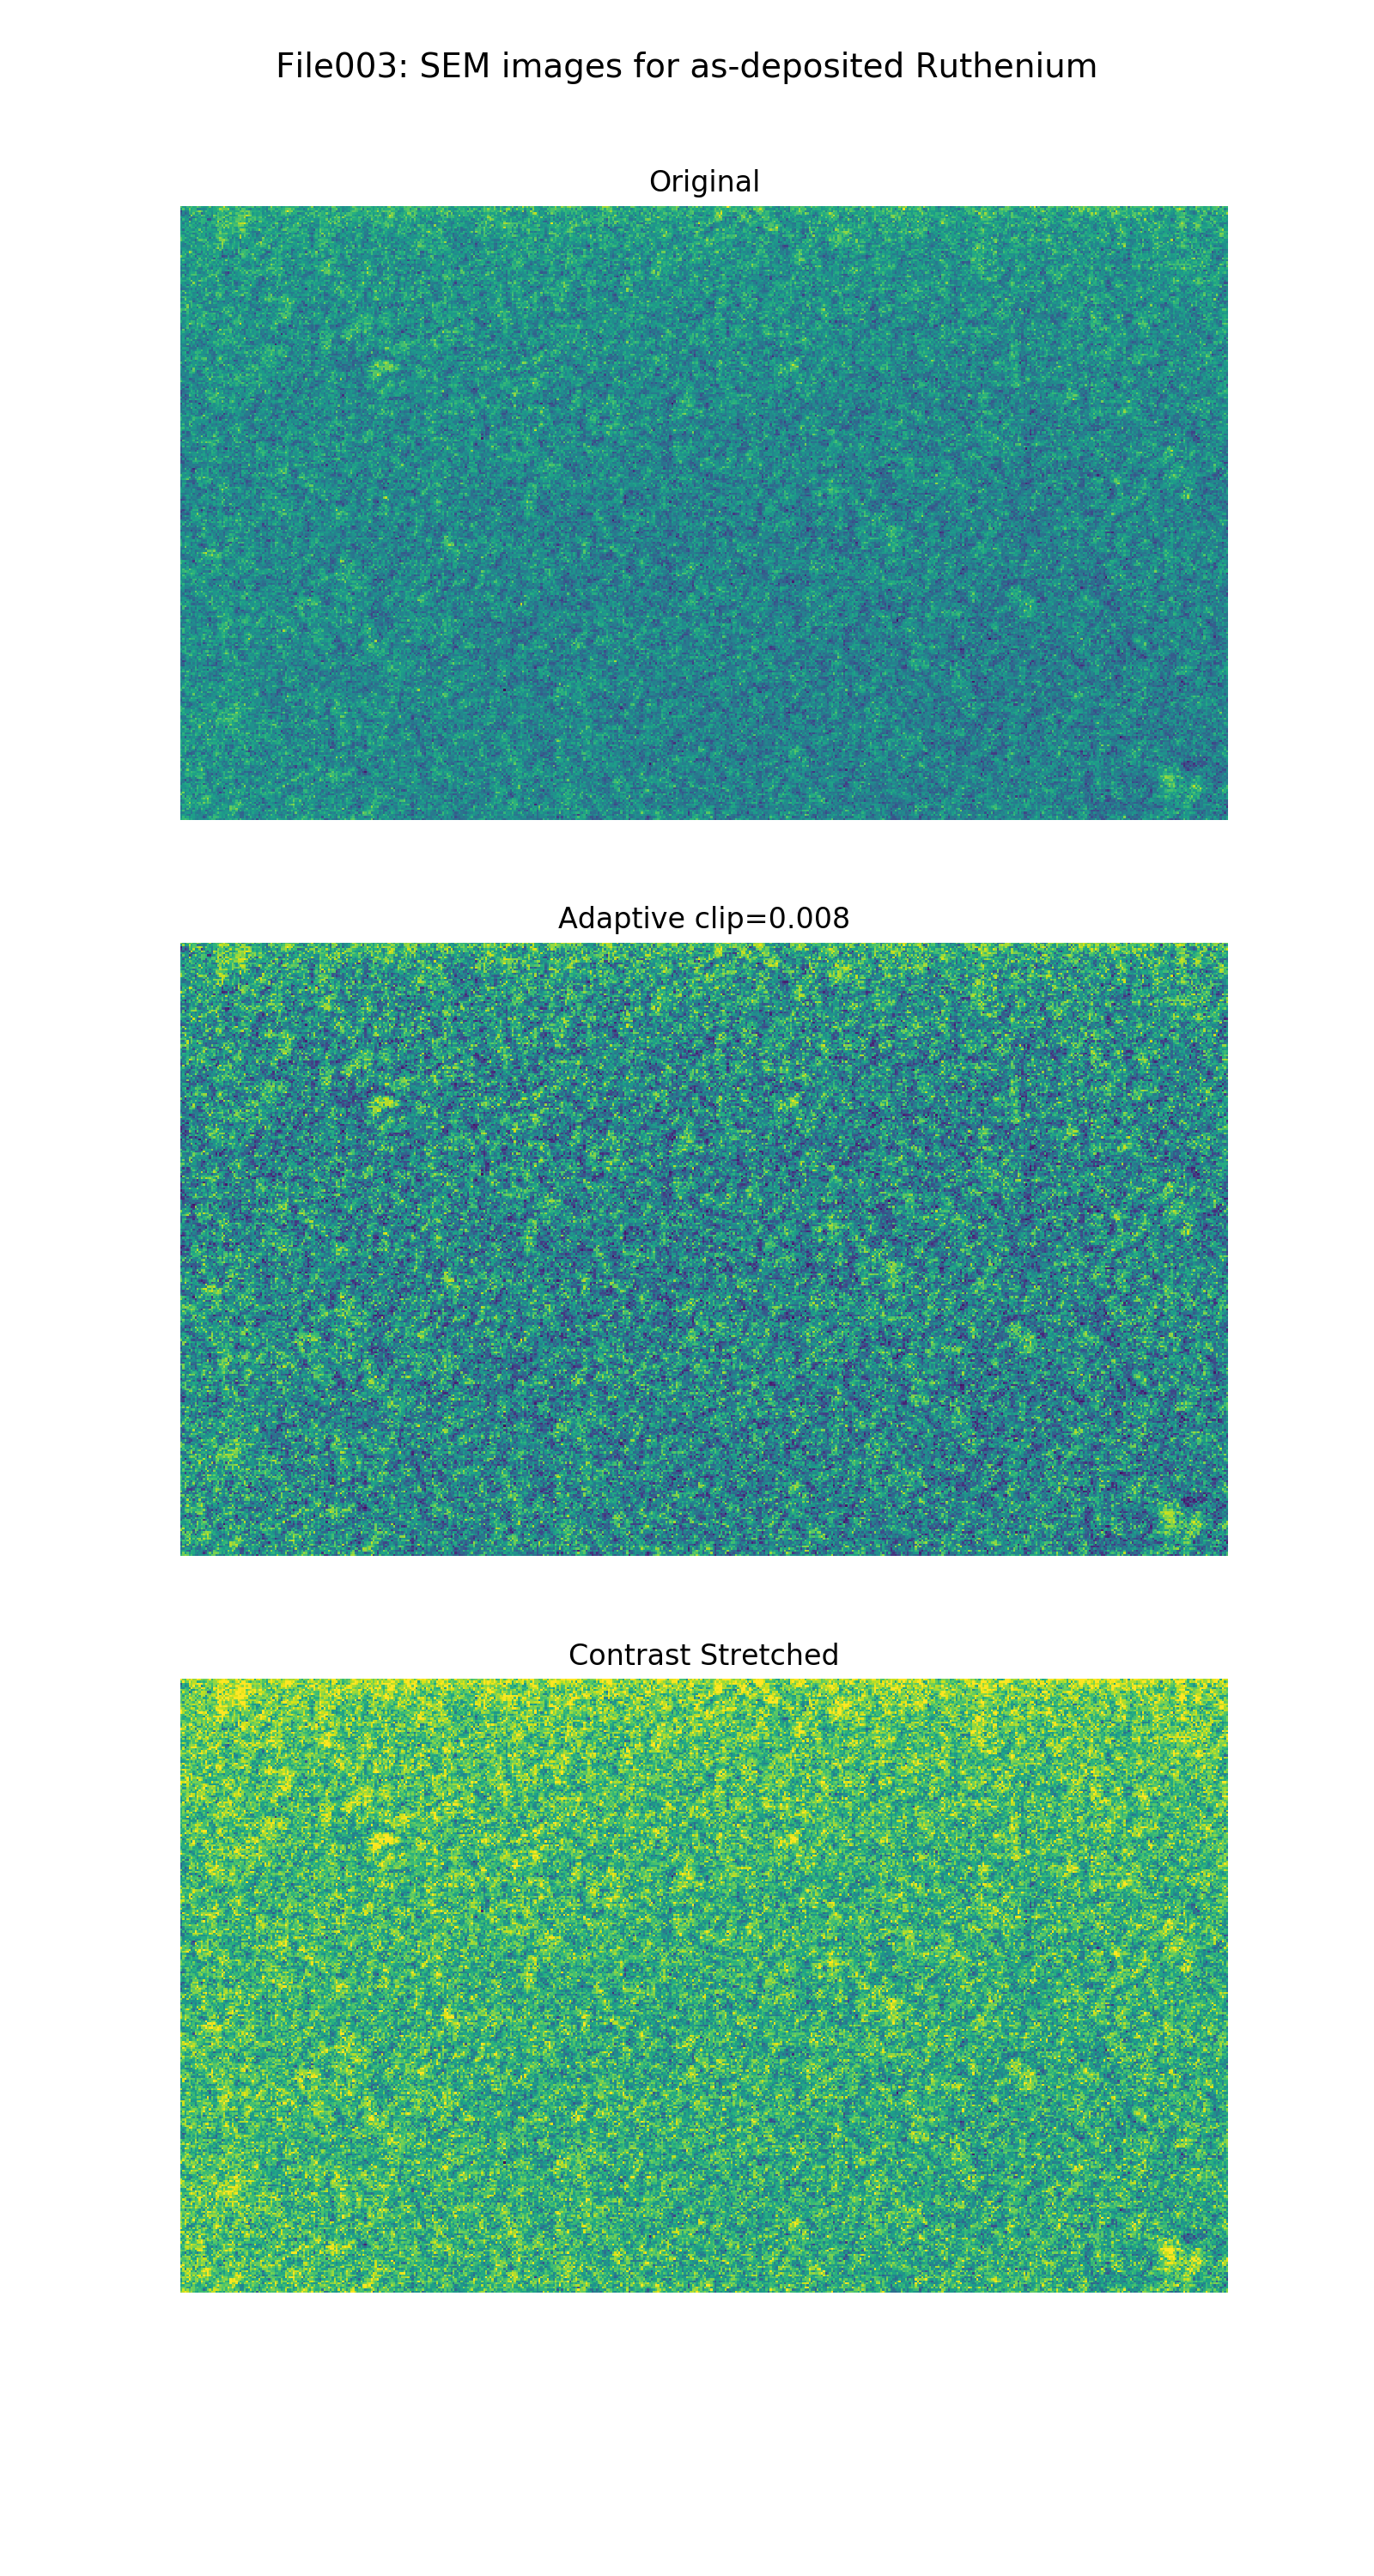

Plotting file: H_asdep_003.tif


In [20]:
# from https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html

#to have different subplots add:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8,15))
ax = np.ravel(ax)

file = filess[0]
print(f"Plotting file: {file}")

img = io.imread(file, as_gray=True)
clip_limit = 0.008
img_eq_adaptive = exposure.equalize_adapthist(img, clip_limit=clip_limit)

p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
    
# if 'L_' in file:
#     density = 'Low'
# elif 'LH_' in file:
#     density = 'Low-High'
# elif 'H_' in file:
#     density = 'High'
    
ax[0].imshow(img[0:300,0:512], cmap='viridis')
ax[1].imshow(img_eq_adaptive[0:300,0:512], cmap='viridis')
ax[2].imshow(img_rescale[0:300,0:512], cmap='viridis')

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')

ax[0].set_title('Original')
ax[1].set_title(f'Adaptive clip={clip_limit}')
ax[2].set_title('Contrast Stretched')

# ax.set_title(f"{density} density")

# fig.tight_layout()

sup_title = f"File{file[-7:-4]}: SEM images for as-deposited Ruthenium"
fig.suptitle(sup_title, fontsize=14)
fig.subplots_adjust(top=0.92)
figname = f"{sup_title}.png"

fname = f"{file}_equalize_test.svg"
fig.savefig(fname=fname)